#### <left>Бронников Максим Андреевич</left>

*M8О-307Б, №4 по списку*

#   <center>Лабораторная работа №3</center>
### <center> Задание №2 </center>

**Построить кубический сплайн для функции, заданной в узлах интерполяции, предполагая, что сплайн имеет нулевую кривизну при $ x = x_0 $  и $ x = x_4 $ . Вычислить значение функции в точке $ x = x^* $.**

### <center> Вариант №4 </center>

$ y = 2.4142, 1.0818, 0.50953, 0.11836, -0.24008. $

$ x_i = 1.0, 1.9, 2.8, 3.7, 4.6. $


$x^{*} = 2.66666667$

## <center> Решение: </center>

### <center> *Вспомогательные функции* </center>

Импортируем бибилиотеки:

In [1]:
import matplotlib.pyplot as plt
import math
import sys
import numpy as np
from functools import reduce

Функция бинарного поиска в списке:

In [2]:
def bin_search(X, val):
    val
 
    mid = len(X) // 2
    low = 0
    high = len(X) - 1
 
    while X[mid] != val and low <= high:
        if val > X[mid]:
            low = mid + 1
        else:
            high = mid - 1
        mid = (low + high) // 2
    return mid

Функция сортировки списка:

In [3]:
def sorting(Xi, Yi):
    to_sort = list(zip(Xi, Yi))
    to_sort.sort(key=lambda x: x[0])
    L1 = list(map(lambda x: x[0], to_sort))
    L2 = list(map(lambda x: x[1], to_sort))
    return L1, L2

Решение трёхдиагональной системы  методом прогонки:

In [4]:
def race_method(A, b):
    P = [-item[2] for item in A]
    Q = [item for item in b]
    
    P[0] /= A[0][1]
    Q[0] /= A[0][1]
    
    for i in range(1, len(b)):
        z = (A[i][1] + A[i][0] * P[i-1])
        P[i] /= z
        Q[i] -= A[i][0] * Q[i-1]
        Q[i] /= z
    
    x = [item for item in Q]
    
    for i in range(len(x) - 2, -1, -1):
        x[i] += P[i] * x[i + 1]
    
    return x

### <center> *Кубический сплайн* </center>

Функции вычисления коэффицентов $ h_i = x_i - x_{i-1} $ и $ c_i $, удовлетворяющих условию: $ h_{i-1}c_{i-1} + 2(h_{i-1} + h_{i}) + h_{i}c_{i+1} = 3\left(\displaystyle\frac{f_i - f_{i-1}}{h_i} - \displaystyle\frac{f_{i-1} - f_{i-2}}{h_{i-1}}\right) $, для $ i = 2,3,...,n $, где $ c_1 = c_{n+1} = 0 $

In [5]:
def compute_h(X):
    h = [X[i] - X[i - 1] for i in range(1, len(X))]
    return h

def compute_c(h, Y):
    A = [[h[i - 1], 2.0*(h[i - 1] + h[i]), h[i]] for i in range(1, len(h))]
    A[0][0] = A[-1][2] = 0.0
    
    v = [3.0*((Yi[i + 1] - Y[i])/h[i] - (Y[i] - Y[i - 1])/h[i - 1]) for i in range(1, len(h))]
    
    return [0.0] + race_method(A, v)

Функции вычисления остальных коэффицентов:

$ a_i = f_{i-1} $, 

$b_i = \displaystyle\frac{(f_i - f_{i-1})}{h_i} - \displaystyle\frac{h_i}{3}(c_{i+1} + 2c_i)$, 

$ d_i = \displaystyle\frac{c_{i+1} - c_i}{3 h_i} $, 

для $ i = 1,3,...,n $, где $ c_1 = c_{n+1} = 0 $

In [6]:
def compute_a(Y):
    a = list(Y[:len(Y)-1])
    return a

def compute_b(Y, h, c):
    b = [(Y[i] - Y[i-1])/h[i-1] - (h[i-1]/3.0)*(2.0*c[i-1] + c[i]) for i in range(1, len(h))]
    b.append((Y[-1] - Y[-2])/h[-1] - (2.0*h[-1]*c[-1])/3.0)
    return b

def compute_d(h, c):
    d = [(c[i] - c[i-1])/(3.0*h[i-1]) for i in range(1, len(h))]
    d.append(-c[-1]/(3.0*h[-1]))
    return d

Функция вычисляет многочлен кубической интерполяции: $ S_n(x) = a_i + b_{i}(x - x_{i-1}) + c_{i}(x - x_{i-1})^2 + d_{i}(x - x_{i-1})^3 $, при $ x_{i-1} \leq x \leq x_i $, $ i = 1, 2, ..., n. $

In [7]:
def qubic_interpol(Xi, Yi):
    X, Y = sorting(Xi, Yi)
    h = compute_h(X)
    c = compute_c(h, Y)
    a = compute_a(Y)
    b = compute_b(Y, h, c)
    d = compute_d(h, c)
    def interpol(x):
        pos = bin_search(X, x)
        if pos < 0:
            return b[0]*x + a[0] - b[0]*X[0]
        elif pos == len(X) - 1:
            return Y[-1] + (b[-1] + 2.0*c[-1]*h[-1] + 3.0*d[-1]*h[-1]*h[-1])*(x - X[-1])
        return a[pos] + b[pos]*(x - X[pos]) + c[pos]*((x - X[pos])**2) + d[pos] * ((x - X[pos])**3)
    return interpol

### <center> *Демонстрация работы* </center>

**а)** Начальные значения из методички задаем в коде:

In [8]:
Xi = [0.0, 1.0, 2.0, 3.0, 4.0]
Yi = [0.0, 1.8415, 2.9093, 3.1411, 3.2432]
Xt = 1.5

Протестируем *Кубическую интерполяцию:*

In [9]:
Sn = qubic_interpol(Xi, Yi)

print("Значение интерпояции:", Sn(Xt))

Значение интерпояции: 2.4969642857142857


**б)** Начальные данные нашего варианта считаем из файла:

In [10]:
Xi = []
Yi = []
with open("data/d2.txt", "r") as file:
    Xi = list(map(float, file.readline().split()))
    Yi = list(map(float, file.readline().split()))
    Xt = float(file.readline())

*Кубическая интерполяция:*

In [11]:
Sn = qubic_interpol(Xi, Yi)

print("Значение интерпояции:", Sn(Xt))

Значение интерпояции: 0.5677413514650418


### <center> *Графическое отображение* </center>

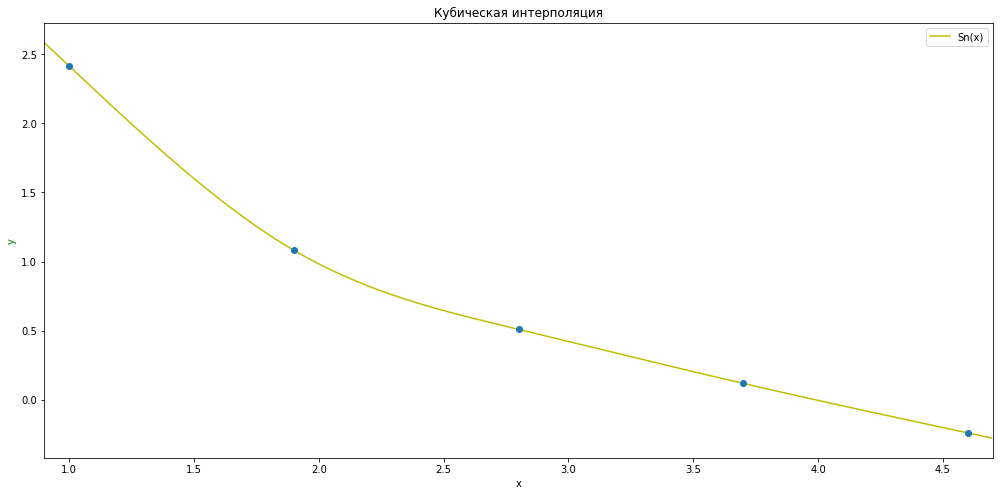

In [12]:
x = np.arange(0.9, 4.7, 0.005)

y = list(map(Sn, x)) 

fig = plt.figure(figsize=(17, 8))
ax1 = fig.add_subplot(111)

line1, = ax1.plot(x, y, 'y', label="f(x)")
ax1.set_xlabel('x')
ax1.set_ylabel('y', color='g')

ax1.plot(list(Xi), list(Yi), 'o', label = "Points")

# set title, plot limits, etc
plt.title('Кубическая интерполяция')
plt.xlim(0.9, 4.7)


# add a legend, and position it on the upper right
plt.legend((line1,), ("Sn(x)",))

plt.show()

###### <center>Сделано Бронниковым Максимом</center>
###### <center>01.04.2020</center>